Задачи исследования

# Шаг 1. Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный.

Путь к файлам

/datasets/visits_log.csv

/datasets/orders_log.csv

/datasets/costs.csv

# Шаг 2. Рассчитайте метрики и постройте графики

Посчитайте метрики трёх видов:
    
продуктовые,

метрики электронной коммерции,

маркетинговые.

Отобразите на графиках изменения каждой метрики во времени. Всякий раз старайтесь подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.
После каждого пункта сформулируйте выводы.

Как рассчитать метрики

2.1. Продуктовые метрики

2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;

2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;

2.1.3. Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;

2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.

2.2. Метрики электронной коммерции

2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;

2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;

2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

2.3. Маркетинговые метрики
Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.
2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени;

2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;

2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

# Шаг 3. Сформулируйте выводы и рекомендации

3.1. Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему;
    
3.2. Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;
    
3.3. Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов;
Оформлениe

Задание выполните в Jupyter Notebook. Код пишите в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Применяйте форматирование и заголовки.

# Описание данных

В вашем распоряжении три датасета.

Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.

# Структура visits_log.csv

Uid — уникальный идентификатор пользователя,

Device — категория устройства пользователя,

Start Ts — дата и время начала сессии,

End Ts — дата и время окончания сессии,

Source Id — идентификатор источника перехода на сайт.

# Структура orders_log.csv

Uid — уникальный идентификатор пользователя,

Buy Ts — дата и время заказа,

Revenue — сумма заказа.

# Структура costs.csv

source_id — идентификатор рекламного источника,

dt — дата проведения рекламной кампании,

costs — расходы на эту кампанию.

# Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Предобработка visits

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.duplicated().sum()

0

In [6]:
# Меняем названия столбцов и приводит даты в порядок
visits.columns.to_list()

['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']

In [7]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [8]:
visits = visits[['device', 'source_id', 'uid', 'start_ts', 'end_ts']]

In [9]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
source_id    359400 non-null int64
uid          359400 non-null uint64
start_ts     359400 non-null datetime64[ns]
end_ts       359400 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Предобработка orders

In [11]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
orders.duplicated().sum()

0

In [14]:
# Меняем названия столбцов и приводит даты в порядок
orders.columns.to_list()

['Buy Ts', 'Revenue', 'Uid']

In [15]:
orders.columns = ['purchase_ts', 'revenue', 'uid']

In [16]:
orders = orders[['uid', 'revenue', 'purchase_ts']]

In [17]:
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'], format = '%Y-%m-%d %H:%M:%S')

In [18]:
orders.head()

,uid,revenue,purchase_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
uid            50415 non-null uint64
revenue        50415 non-null float64
purchase_ts    50415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Предобработка costs

In [20]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [22]:
costs.duplicated().sum()

0

In [23]:
costs.columns.to_list()

['source_id', 'dt', 'costs']

In [24]:
costs.columns = ['source_id', 'date', 'costs']

In [25]:
costs = costs[['source_id', 'costs', 'date']]

In [26]:
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

In [27]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
costs        2542 non-null float64
date         2542 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [28]:
costs.tail()

,source_id,costs,date
2537,10,9.92,2018-05-27
2538,10,21.26,2018-05-28
2539,10,11.32,2018-05-29
2540,10,33.15,2018-05-30
2541,10,17.60,2018-05-31


# Шаг 2. Рассчитайте метрики и постройте графики

2.1. Продуктовые метрики

2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период.

In [29]:
visits.head()

,device,source_id,uid,start_ts,end_ts
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00


In [30]:
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year

In [31]:
DAU = visits.groupby('date').agg({'uid': 'nunique'}).mean()
print("Ежедневная аудитория DAU {0:.2f} человек".format(DAU[0]))

Ежедневная аудитория DAU 907.99 человек


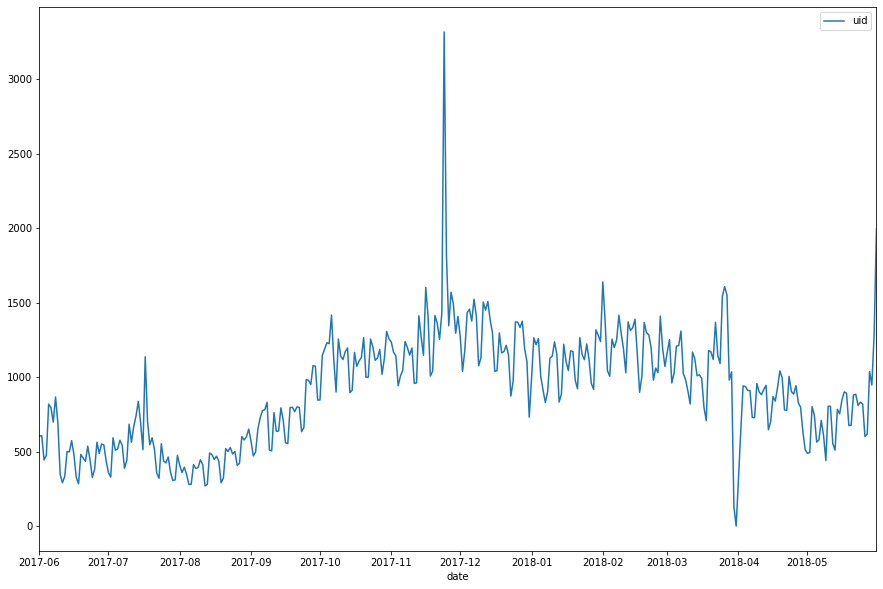

In [32]:
DAU = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()
DAU.plot(x='date', y='uid', figsize=(15,10))
plt.show()

In [33]:
WAU = visits.groupby('week').agg({'uid': 'nunique'}).mean()
print("Еженедельная аудитория WAU {0:.2f} человек".format(WAU[0]))

Еженедельная аудитория WAU 5825.29 человек


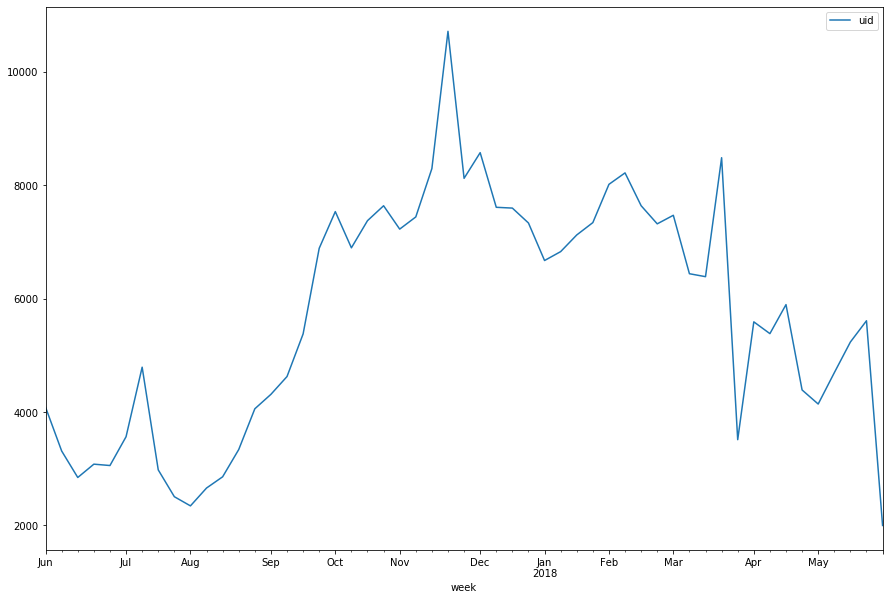

In [34]:
visits['week'] = visits['date'].values.astype('datetime64[W]')
WAU = visits.groupby('week').agg({'uid': 'nunique'}).reset_index()
WAU.plot(x='week', y='uid', figsize=(15,10))
plt.show()

In [35]:
MAU = visits.groupby('month').agg({'uid': 'nunique'}).mean()
print("Ежемесячная аудитория MAU {0:.2f} человек".format(MAU[0]))

Ежемесячная аудитория MAU 23228.42 человек


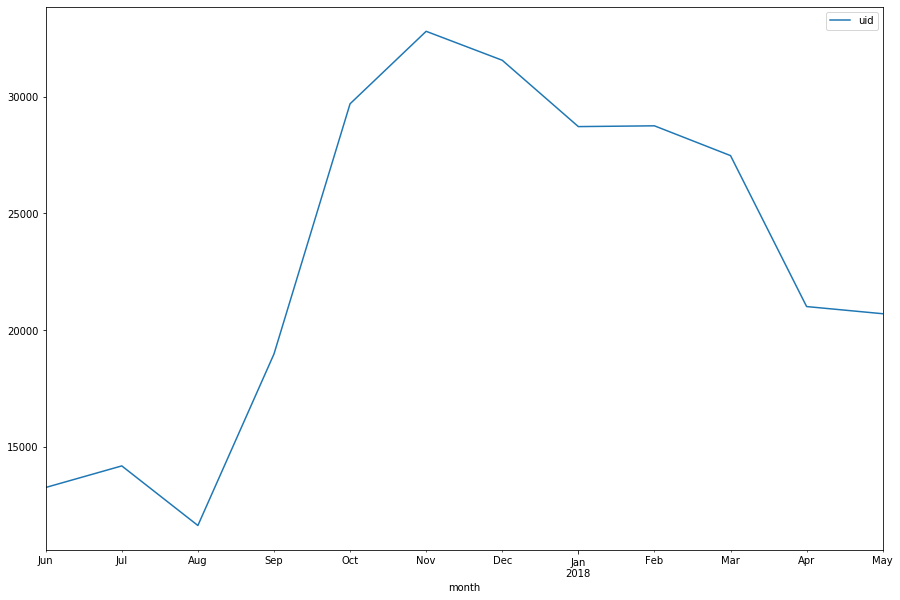

In [36]:
visits['month'] = visits['date'].values.astype('datetime64[M]')
MAU = visits.groupby('month').agg({'uid': 'nunique'}).reset_index()
MAU.plot(x='month', y='uid', figsize=(15,10))
plt.show()

2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт.

In [37]:
session_count = visits.groupby('date').agg({'uid': 'count'}).mean()
print("Количество сессий в день {0:.2f} ".format(session_count[0]))

Количество сессий в день 987.36 


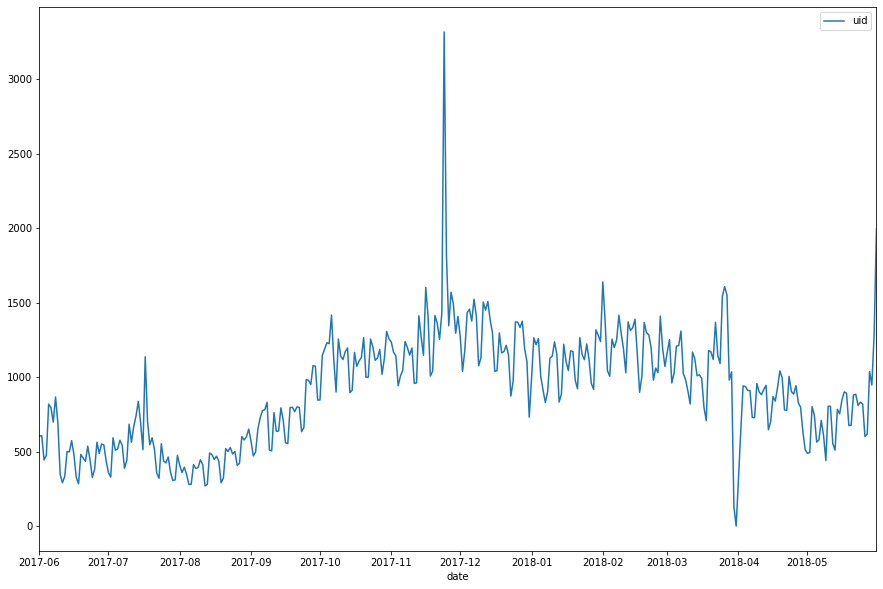

In [38]:
session_count = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()
session_count.plot(x='date', y='uid', figsize=(15,10))
plt.show()

2.1.3. Исследуйте, сколько времени пользователи проводят на сайте.

In [39]:
visits['session_duration_minunes'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

In [40]:
visits['session_duration_minunes'].describe()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_minunes, dtype: float64

In [41]:
visits['session_duration_minunes'].mode()

0    1.0
dtype: float64

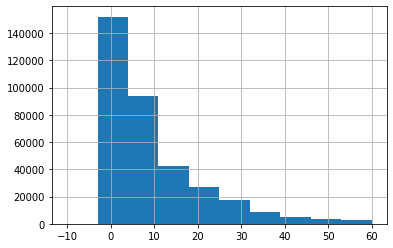

In [42]:
visits['session_duration_minunes'].hist(bins=10, range=(-10, 60))

Сначала использовал 3(чтоб нагляднее было видно лично для меня), сейчас использовал 10 корзин, потому что перевел с секунд на минуты и это цифра оказалось самой визуально приятной

Одна сессия длится: 
- в среднем 10 минут
- в медианном 5 минут
- в моде 1 минуту

2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике.

In [43]:
first_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [44]:
visits = visits.merge(first_visit)
visits.head()

,device,source_id,uid,start_ts,end_ts,date,week,month,year,session_duration_minunes,first_visit
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,2017-12-14,2017-12-01,2017,18.0,2017-12-20 17:20:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,2018-02-15,2018-02-01,2018,28.0,2018-02-19 16:53:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017,0.0,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,2018-05-17,2018-05-01,2018,24.0,2018-03-09 20:05:00
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,2018-03-08,2018-03-01,2018,28.0,2018-03-09 20:05:00


In [45]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

In [46]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,week,month,year,session_duration_minunes,first_visit,first_visit_month,visit_month
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,2017-12-14,2017-12-01,2017,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,2018-02-15,2018-02-01,2018,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,2018-05-17,2018-05-01,2018,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,2018-03-08,2018-03-01,2018,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01


In [47]:
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [48]:
cohort_visits = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
f_uid.columns = ['first_visit_month', 'f_uid']
f_uid.head()

,first_visit_month,f_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [49]:
cohort_visits = cohort_visits.merge(f_uid)
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['f_uid']
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')

visits_retention_pivot.mean() * 100

lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

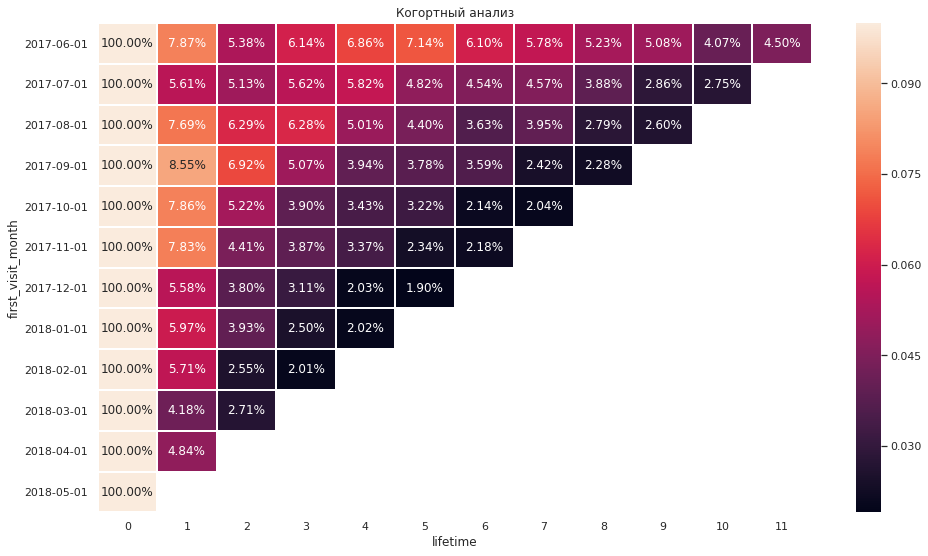

In [50]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ')
ax = sns.heatmap(visits_retention_pivot, vmax=0.1, annot=True, fmt='.2%', linewidths=1, linecolor='white')
ax.set_yticklabels(visits_retention_pivot.index.date)
plt.show()

Как люди возвращаются:

в основном люди отваливаются, в целом бизнес "одноразовый", 
мало кто будет ходить каждый месяц стабильно на протяжении года.
Остальные отваливаются уже медленнее, возможно, это связано с графиками премьер,
иногда премьеры выходят одна за другой, чтобы успеть собрать кассу.

# 2.2. Метрики электронной коммерции

2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [51]:
orders.head()

,uid,revenue,purchase_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


In [52]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,week,month,year,session_duration_minunes,first_visit,first_visit_month,visit_month,lifetime
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,2017-12-14,2017-12-01,2017,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,2018-02-15,2018-02-01,2018,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,2018-05-17,2018-05-01,2018,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,2018-03-08,2018-03-01,2018,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


In [53]:
first_visit = visits.groupby('uid').agg({'start_ts':'min'})\
                .rename(columns={'start_ts':'first_visit_date'})\
                .reset_index()

In [54]:
first_order = orders.groupby('uid').agg({'purchase_ts':'min'})\
                .rename(columns={'purchase_ts':'first_purchase_date'})\
                .reset_index()

In [55]:
buying_time = first_visit.merge(first_order, on='uid', how='inner')

In [56]:
buying_time.head()

,uid,first_visit_date,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [57]:
buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.seconds

In [58]:
buying_time.head()

,uid,first_visit_date,first_purchase_date,buying_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,82920
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,4740
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,71040
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


In [59]:
buying_time['buying_time'].mode()

0    60
dtype: int64

In [60]:
buying_time['buying_time'].describe()

count    36523.000000
mean     14949.881445
std      25784.567076
min          0.000000
25%        240.000000
50%        960.000000
75%      15120.000000
max      86340.000000
Name: buying_time, dtype: float64

In [61]:
buying_time[buying_time['buying_time'] == 0].count()

uid                    2467
first_visit_date       2467
first_purchase_date    2467
buying_time            2467
dtype: int64

Text(0.5, 1.0, 'Время в секундах от первого визита до покупки')

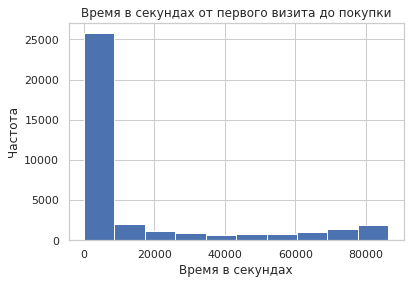

In [62]:
ax = buying_time['buying_time'].hist()
ax.set_xlabel('Время в секундах')
ax.set_ylabel('Частота')
ax.set_title('Время в секундах от первого визита до покупки')

Когда люди начинают покупать:
- в среднем через 249 минут
- в медианном через 16 минут
- мода сессии перед покупкой - 1 минута

2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев

In [63]:
orders['order_month'] = orders['purchase_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
 
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
 
cohort_sizes.columns = ['first_order_month', 'n_buyers']
 
orders_first_month = pd.merge(orders, first_orders, on ='uid')
 
cohorts = orders_first_month.groupby(['first_order_month', 'order_month']).agg({'uid': 'nunique'}).reset_index()
 
report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
report['age'] = (report['order_month'] - report['first_order_month'])/np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['n_buy'] = report['uid'] / report['n_buyers']
 
result = report.pivot_table(index = 'first_order_month', columns = 'age', values = 'n_buy', aggfunc = 'mean')

result = result.cumsum(axis=1).round(2)#.fillna('')

result

display('Cреднее число покупок на 1 клиента за пол года',result[5].mean())

'Cреднее число покупок на 1 клиента за пол года'

1.1442857142857144

2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки

In [64]:
display(orders.head())

,uid,revenue,purchase_ts,order_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01


In [65]:
order_aver_bill = orders[['purchase_ts', 'revenue','uid']]
display(order_aver_bill.head())

,purchase_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [66]:
order_aver_bill_first = order_aver_bill.groupby('uid')['purchase_ts'].min()
order_aver_bill_first.name = 'first_order_date'
display(order_aver_bill_first.head())

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order_date, dtype: datetime64[ns]

In [67]:
order_aver_bill = order_aver_bill.join(order_aver_bill_first, on='uid')
display(order_aver_bill.head())

,purchase_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [68]:
order_aver_bill['first_order_month'] = order_aver_bill['first_order_date'].astype('datetime64[M]')
order_aver_bill['order_month'] = order_aver_bill['purchase_ts'].astype('datetime64[M]')
display(order_aver_bill.head())

,purchase_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [69]:
cohorts_order_aver_bill = order_aver_bill.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum', 'uid':'nunique'})
display(cohorts_order_aver_bill.head())

revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88

In [70]:
#Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid и добавим столбец со средним чеком
cohorts_order_aver_bill['revenue_per_user'] = cohorts_order_aver_bill['revenue'] / cohorts_order_aver_bill['uid'] 
display(cohorts_order_aver_bill.head())

revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2023          4.724414
                  2017-07-01    981.82    61         16.095410
                  2017-08-01    885.34    50         17.706800
                  2017-09-01   1931.30    54         35.764815
                  2017-10-01   2068.58    88         23.506591

In [71]:
#Построим сводную таблицу 
cohorts_order_aver_bill.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


,first_order_month,revenue,uid,aver_bill_month
0,2017-06-01,24031.69,2653,9.058308
1,2017-07-01,16127.92,2348,6.868790
2,2017-08-01,11606.26,1721,6.743905
3,2017-09-01,34676.32,3147,11.018850
4,2017-10-01,27603.45,5049,5.467112
5,2017-11-01,26098.99,4720,5.529447
6,2017-12-01,33485.74,4842,6.915684
7,2018-01-01,16663.13,3658,4.555257
8,2018-02-01,16750.50,3866,4.332773
9,2018-03-01,19273.41,3681,5.235917


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
first_order_month    13 non-null datetime64[ns]
revenue              13 non-null float64
uid                  13 non-null int64
aver_bill_month      13 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 544.0 bytes


None

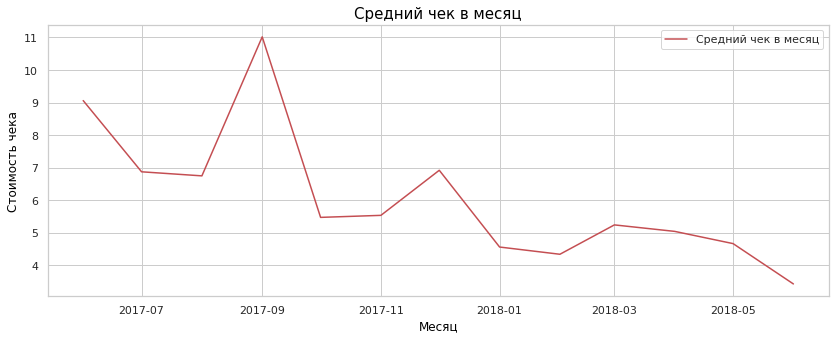

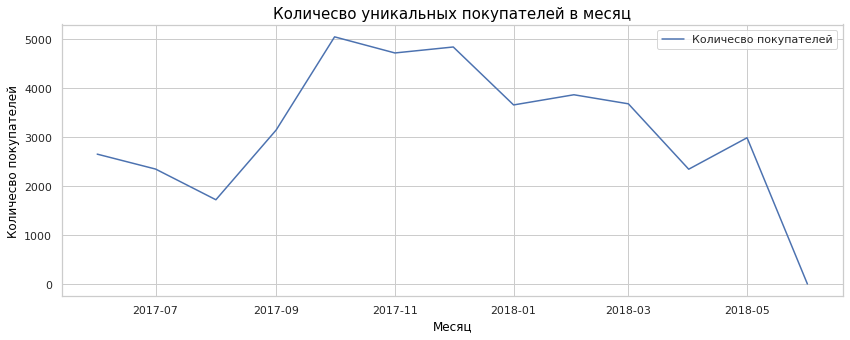

In [72]:
#Сделаем сводную таблицу по месяцам с общей выручкой и количеством покупателей, добавим столбец со средним чеком
cohorts_order_aver_bill_one = cohorts_order_aver_bill.groupby('first_order_month').agg({'revenue':'sum','uid':'sum'}).reset_index()
cohorts_order_aver_bill_one['aver_bill_month'] = cohorts_order_aver_bill_one['revenue']/cohorts_order_aver_bill_one['uid']
display(cohorts_order_aver_bill_one)
display(cohorts_order_aver_bill_one.info())
plt.figure(figsize=(14, 5))
plt.plot(cohorts_order_aver_bill_one['first_order_month'], cohorts_order_aver_bill_one['aver_bill_month'], '-r')
#plt.plot(cohorts_order_aver_bill_one['first_order_month'], cohorts_order_aver_bill_one['uid'], '-b')
plt.title('Средний чек в месяц', fontsize=15, color='black')
plt.xlabel('Месяц',fontsize=12, color='black')
plt.ylabel('Стоимость чека',fontsize=12, color='black')
plt.legend(['Средний чек в месяц'])
plt.show()

plt.figure(figsize=(14, 5))
#plt.plot(cohorts_order_aver_bill_one['first_order_month'], cohorts_order_aver_bill_one['aver_bill_month'], '-r')
plt.plot(cohorts_order_aver_bill_one['first_order_month'], cohorts_order_aver_bill_one['uid'], '-b')
plt.title('Количесво уникальных покупателей в месяц', fontsize=15, color='black')
plt.xlabel('Месяц',fontsize=12, color='black')
plt.ylabel('Количесво покупателей',fontsize=12, color='black')
plt.legend(['Количесво покупателей'])
plt.show()

2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика.

In [73]:
orders['order_month'] = orders['purchase_ts'].astype('datetime64[M]')
costs['month'] = costs['date'].astype('datetime64[M]') 

In [74]:
first_order = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order.columns = ['uid', 'first_order_month']

In [75]:
cohort_sizes = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [76]:
orders_new = pd.merge(orders, first_order, on='uid')

In [77]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [78]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [79]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [80]:
report['ltv'] = report['gp'] / report['n_buyers']

In [81]:
ltv_cohorts = report.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index()

In [82]:
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output = output.cumsum(axis=1).round(2) 
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


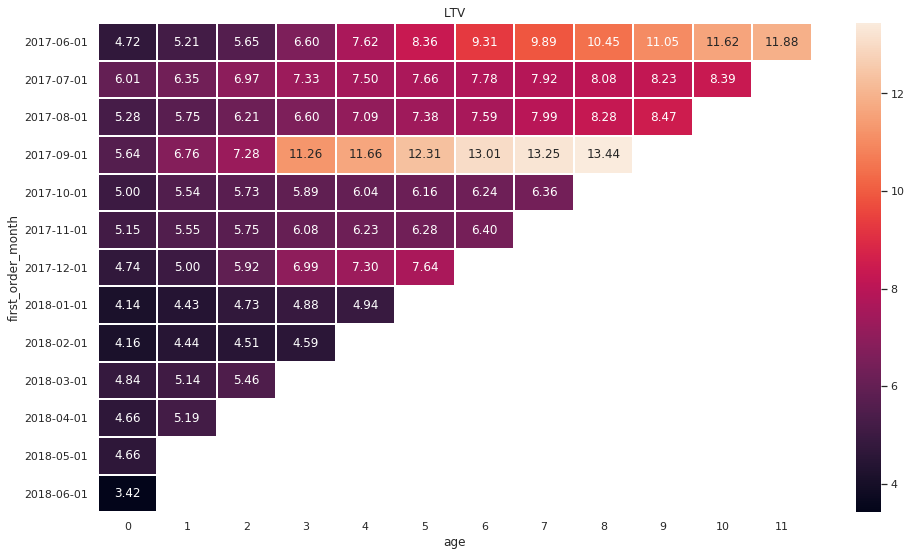

In [83]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('LTV')
ax = sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='white')
ax.set_yticklabels(output.index.date)
plt.show()

<div class="alert alert-info"> 
<b>Комментарий студента:</b> 
Надеюсь я все правильно понял</div>


Сильнее всего выделяються июнь и сентябрь 2017.Возможно покупатели этих когорт были привлечены сеззоными акциями и скидками. Возможно это и повлияло на их лояльность к сервесу.

2.3. Маркетинговые метрики

2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам.

In [84]:
costs['costs'].sum()

329131.62

In [85]:
display(costs.groupby('source_id').agg({'costs':'sum'}))

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [86]:
display(costs.groupby('month').agg({'costs':'sum'}))

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


Построим сводные таблицы расходов на маркетинг на каждый источник

In [87]:
cost_every_source = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()
cost_every_source = cost_every_source.rename(columns={'month':'data'})
display(cost_every_source.head())
display(cost_every_source['costs'].sum())

,data,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


329131.61999999994

In [88]:
#Количество посетителей, приобретенных на каждую конкретную дату из каждого конкретного источника
visit_date_source = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first', 'start_ts': 'first'}).reset_index()
visit_date_source = visit_date_source.rename(columns={'start_ts':'data'})
visit_date_source['data'] = visit_date_source['data'].astype('datetime64[M]')
display(visit_date_source.head())

,uid,source_id,data
0,11863502262781,3,2018-03-01
1,49537067089222,2,2018-02-01
2,297729379853735,3,2017-06-01
3,313578113262317,2,2017-09-01
4,325320750514679,5,2017-09-01


In [89]:
#Количество посетителей привлеченных из конкретного источника с разбивкой по месяцам
visit_count_uid = visit_date_source.groupby(['data','source_id']).agg({'uid':'nunique'}).reset_index()
display(visit_count_uid.head())
print()
display('Cумма расходов на маркетинг на каждый источник' , cost_every_source.head())

,data,source_id,uid
0,2017-06-01,1,631
1,2017-06-01,2,1262
2,2017-06-01,3,4080
3,2017-06-01,4,3447
4,2017-06-01,5,2728


'Cумма расходов на маркетинг на каждый источник'

,data,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [90]:
costs_to_client = pd.merge(visit_count_uid, cost_every_source, on=['source_id', 'data'])
display(costs_to_client.head())

,data,source_id,uid,costs
0,2017-06-01,1,631,1125.61
1,2017-06-01,2,1262,2427.38
2,2017-06-01,3,4080,7731.65
3,2017-06-01,4,3447,3514.80
4,2017-06-01,5,2728,2616.12


In [91]:
#столбец стоимость привлечения одного клиента
costs_to_one_client = costs_to_client.groupby('source_id').agg({'uid':'sum', 'costs':'sum'}).reset_index()
costs_to_one_client['attracting_one_buyer'] = costs_to_client['costs']/costs_to_client['uid']
costs_to_one_client = costs_to_one_client.sort_values(by='attracting_one_buyer', ascending=False)
display(costs_to_one_client.head(10))

,source_id,uid,costs,attracting_one_buyer
1,2,17616,42806.04,1.923439
2,3,66116,141321.63,1.895012
0,1,9469,20833.27,1.783851
3,4,72346,61073.60,1.019669
4,5,49237,51757.10,0.958988
6,10,6903,5822.49,0.793485
5,9,6448,5517.49,0.400028


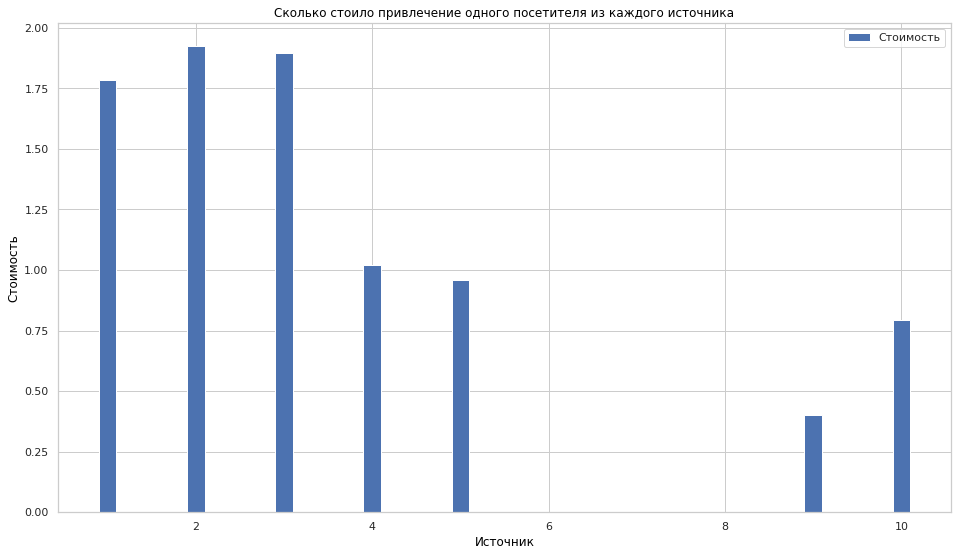

In [92]:
plt.figure(figsize=(16, 9))
plt.bar(costs_to_one_client['source_id'], costs_to_one_client['attracting_one_buyer']);
plt.title('Сколько стоило привлечение одного посетителя из каждого источника', color='black')
plt.xlabel('Источник',fontsize=12, color='black')
plt.ylabel('Стоимость',fontsize=12, color='black')
plt.legend([ 'Стоимость']);

Вывод: наименьшие затраты на привлечение одного посетителя у нас имеют источники 9 и 10

In [93]:
# покупатели по каналам
visits_sorted = visits.sort_values(by='start_ts')

# затраты по каналам
costs_per_source = costs.groupby('source_id').agg({'costs': 'sum'})

# выручка по каналам
first_source_per_user = visits_sorted.groupby('uid').agg({'source_id': 'first'})

display('first_source_per_user', first_source_per_user.head())

client_per_source = orders.merge(first_source_per_user, on='uid')

display('Merge_client_per_source', client_per_source.head())

# суммируем колисчество покупателей с канала
client_per_source = client_per_source.groupby('source_id').agg({'uid': 'nunique'})
display(client_per_source.head(20))

'first_source_per_user'

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


'Merge_client_per_source'

,uid,revenue,purchase_ts,order_month,source_id
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,1
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,3


,uid
source_id,
1,2899
2,3506
3,10473
4,10296
5,6931
7,1
9,1088
10,1329


In [94]:
# уникальные пользователи по каналам
# общее количество визитов с каждого источника
uid_per_source = visits_sorted.groupby('source_id').agg({'uid': 'nunique'})
display('uid_per_source', uid_per_source.head(20))
rev_per_source = orders.merge(first_source_per_user, on='uid')
rev_per_source = rev_per_source.groupby('source_id').agg({'revenue': 'sum'})

rev_uid_costs_per_source = pd.concat([costs_per_source, rev_per_source, 
                                      uid_per_source, client_per_source],axis=1).fillna(0)
rev_uid_costs_per_source = rev_uid_costs_per_source.reset_index()

#rev_uid_costs_per_source['index'] = 'source ' + rev_uid_costs_per_source['index'].astype('str')
#rev_uid_costs_per_source = rev_uid_costs_per_source.set_index('index')
rev_uid_costs_per_source.columns = ['source_id', 'costs', 'revenue', 'uid', 'clients']
display(rev_uid_costs_per_source.head(20))

'uid_per_source'

,uid
source_id,
1,18999
2,26245
3,74756
4,83525
5,56974
6,6
7,34
9,9264
10,8067


,source_id,costs,revenue,uid,clients
0,1,20833.27,31090.55,18999,2899.0
1,2,42806.04,46923.61,26245,3506.0
2,3,141321.63,54511.24,74756,10473.0
3,4,61073.60,56696.83,83525,10296.0
4,5,51757.10,52624.02,56974,6931.0
5,6,0.00,0.00,6,0.0
6,7,0.00,1.22,34,1.0
7,9,5517.49,5759.40,9264,1088.0
8,10,5822.49,4450.33,8067,1329.0


In [95]:
#Посчитаем стоимость привлечения одного клиента по каждому из каналов рекламы:
rev_uid_costs_per_source['price_for_client'] = (rev_uid_costs_per_source['costs']/rev_uid_costs_per_source['clients']).round(2)
display(rev_uid_costs_per_source.head(20))

,source_id,costs,revenue,uid,clients,price_for_client
0,1,20833.27,31090.55,18999,2899.0,7.19
1,2,42806.04,46923.61,26245,3506.0,12.21
2,3,141321.63,54511.24,74756,10473.0,13.49
3,4,61073.60,56696.83,83525,10296.0,5.93
4,5,51757.10,52624.02,56974,6931.0,7.47
5,6,0.00,0.00,6,0.0,NaN
6,7,0.00,1.22,34,1.0,0.00
7,9,5517.49,5759.40,9264,1088.0,5.07
8,10,5822.49,4450.33,8067,1329.0,4.38


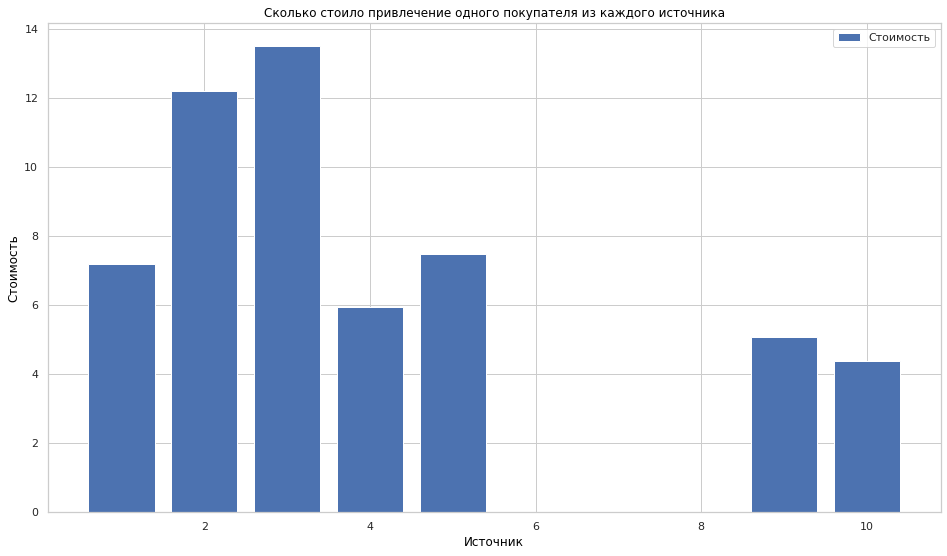

In [96]:
plt.figure(figsize=(16, 9))
plt.bar(rev_uid_costs_per_source['source_id'], rev_uid_costs_per_source['price_for_client']);
plt.title('Сколько стоило привлечение одного покупателя из каждого источника', color='black')
plt.xlabel('Источник',fontsize=12, color='black')
plt.ylabel('Стоимость',fontsize=12, color='black')
plt.legend([ 'Стоимость']);

Вывод: наименьшие затраты на привлечение одного покупателя у нас так же имеют источники 9 и 10

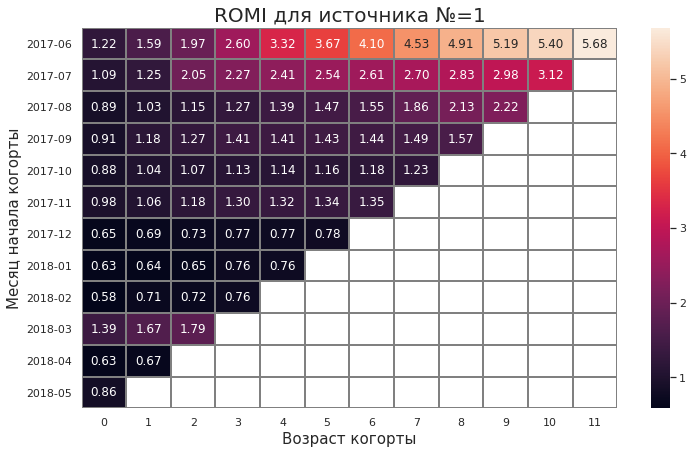

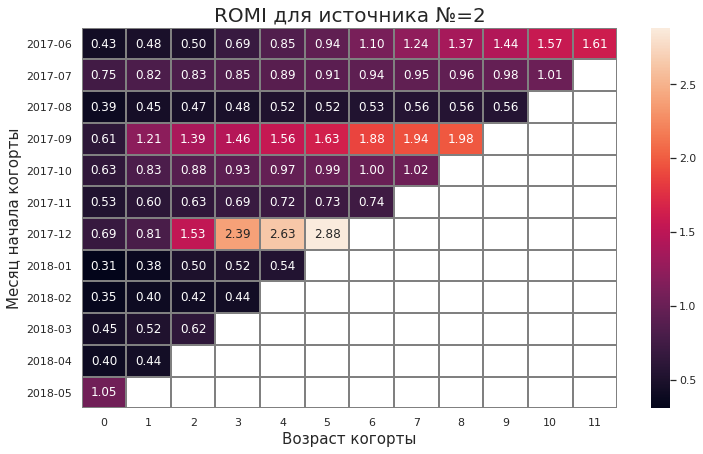

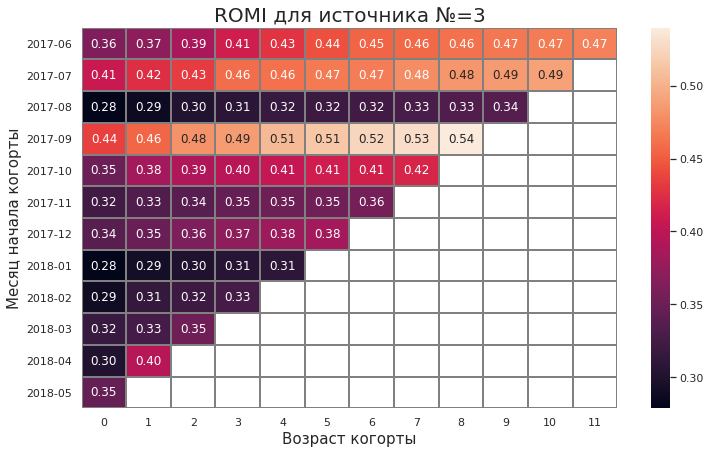

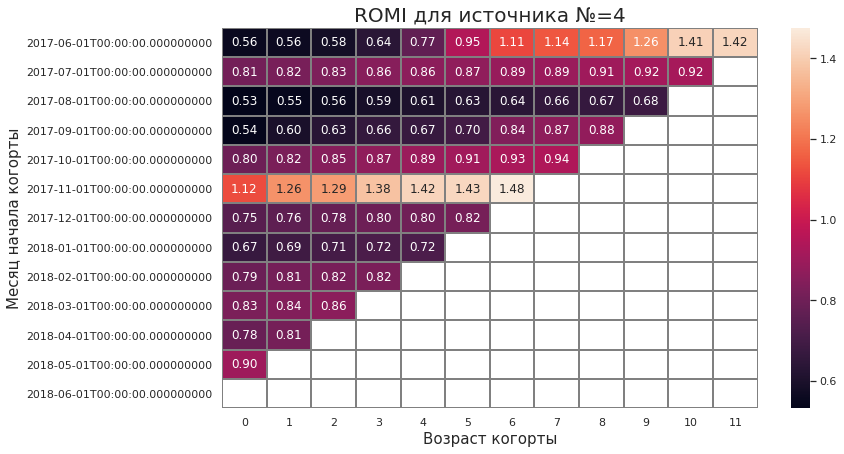

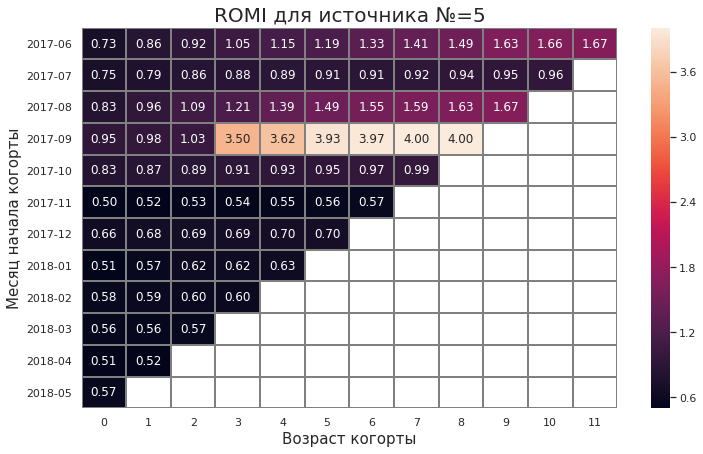

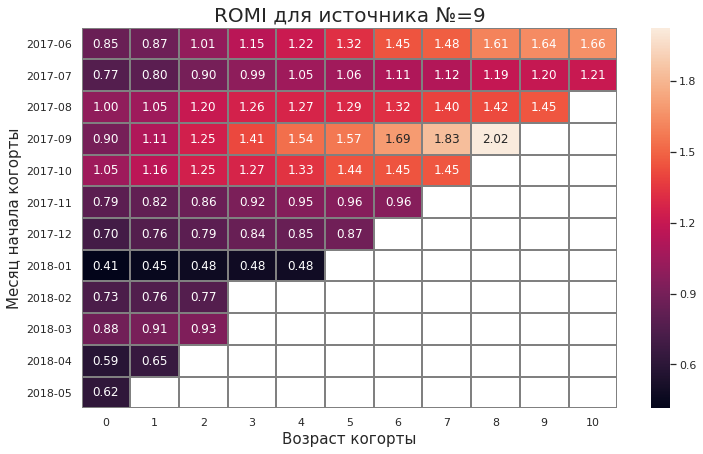

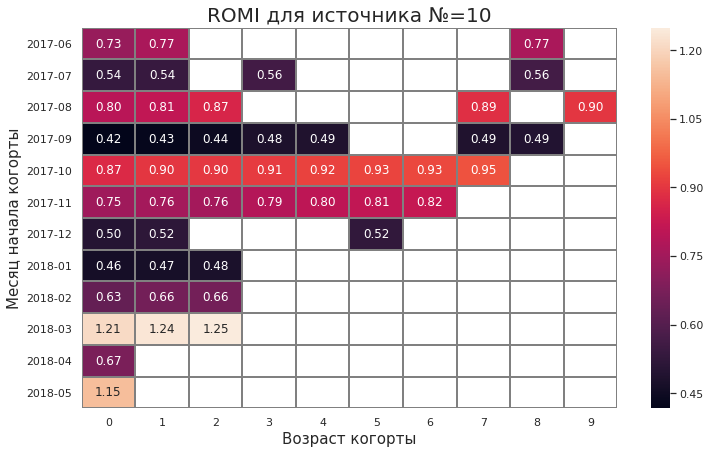

In [98]:
users = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first', 'start_ts': 'first'})
orders_newest = orders.merge(orders.groupby('uid').agg({'order_month': 'min'}).reset_index().rename(columns = {'order_month': 'first_order_month'}),on = 'uid')  
for source in [1, 2, 3, 4, 5, 9, 10]:
 
    source_users=users.query('source_id == @source').index.values
    source_orders=orders_newest.query('uid in @source_users')
 
    cohort_sizes=(source_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index())
    cohort_sizes.columns=['first_order_month', 'n_buyers']
    cohort_sizes['first_order_month']=pd.to_datetime(cohort_sizes['first_order_month'])
 
    cohorts=(source_orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index())
    cohorts['first_order_month']=pd.to_datetime(cohorts['first_order_month'])
 
    report=cohort_sizes.merge(cohorts, on='first_order_month')
 
    margin_rate=1
 
    report['gp']=report['revenue']*margin_rate
    report['age']=(report['order_month']-report['first_order_month'])/np.timedelta64(1, 'M')
    report['age']=report['age'].round().astype('int')
    report['ltv']=report['gp']/report['n_buyers']
    report['first_order_month']=report['first_order_month'].dt.strftime('%Y-%m')
 
    output=report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
    output=output.cumsum(axis=1)
 
 
    source_costs=costs.query('source_id==@source')
    source_costs=source_costs.groupby('month').agg({'costs':'sum'})
    source_costs=source_costs.join(cohort_sizes.set_index('first_order_month'))
    source_costs['cac']=source_costs['costs']/source_costs['n_buyers']
 
    output2=output.div(source_costs['cac'], axis=0)
    sns.set(style='white')
    plt.figure(figsize=(12, 7))
    sns.heatmap(data=output2, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    plt.ylabel('Месяц начала когорты', fontsize = 15)
    plt.xlabel('Возраст когорты', fontsize = 15) 
    plt.title('ROMI для источника №={}'.format(source), fontsize = 20)

У части источников был минус, у части источников был плюс. Лучший по окупаемости источник 1, самые проблемные по окуппаемости 3 и 10 рекламные источники

Вывод: компании в которые люди приходят с мобильных устройств не окупаются

Вывод: десктопная версия афиши окупается гораздо лучше мобильной, вложения в первую рекламную компанию окупились уже на второй месяц. самые проблемные по окупаемости 3 и 10 рекламная компании

Шаг 3. Сформулируйте выводы и рекомендации

Общий вывод:
- основываясь на показателях romi, мы видим проблемы окупаемости 3 и 10 рекламной компании
- основываясь на показателях romi, мы видим проблемы окупаемости рекламных команий на которые приходят с мобильных устройств

Рекомендации маркетологам:
- Закрыть или глубоко преработать рекламные компании 3 и 10 как нерентабельные на прошедший год
- Переработать мобильное приложение и обратить внимание на отображение сайта на мобильных устройствах. Хотя мобильные приложения как правило обгоняют по частоте использования десктопные версии у нас наблюдается обратная картина.